In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# Generating 2*e^6 random coordinates across 8192^3 cube
dx = 2*np.pi/8192
npoints = 2*10**6
points = []
for i in range(npoints):
        points.append(np.random.uniform(low=0, high=8192., size=(1,3))*dx)

In [3]:
################################# Compute \Phi_\ell ######################################

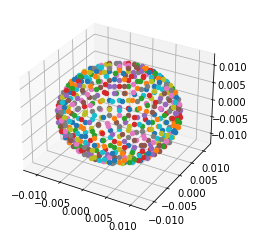

In [4]:
# Sphere surface kernel

# Number of points in the sphere
num_points = 500
r = 1
# Radius of the sphere
R = 15*dx 

alpha = 4.0 * np.pi * r**2 / num_points
ds = np.sqrt(alpha)
i_nu = int(np.round(np.pi / ds))
d_nu = np.pi / i_nu
d_phi = alpha / d_nu
count = 0
points_on_surface = []

fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range (0 , i_nu):
    theta = np.pi * (i + 0.5) / i_nu
    j_phi = int(np.round(2 * np.pi * np.sin(theta) / d_phi))
    for j in range (0, j_phi):
        phi = 2 * np.pi * j / j_phi
        x  = R * np.sin(theta) * np.cos(phi)
        y  = R * np.sin(theta) * np.sin(phi)
        z  = R * np.cos(theta)
        count += 1
        points_on_surface.append([x, y, z])        
        ax.scatter3D(x, y, z, 'gray')

In [ ]:
Int_dujdui2dsj = [] 
# Sphere volume
V = (4/3*np.pi*R**3)

# Iterate 10000 random points
for point in points:
    
    # Coordinates for +/- points
    Points_plus  =  np.array(points_on_surface) + point
    Points_minus = -np.array(points_on_surface) + point
    
    # velocities at + points
    Velocity_plus  = # Velocity at 'Points_plus'  from users' database      
    # velocities at - points
    Velocity_minus = # Velocity at 'Points_minus' from users' database 

    # njdS
    r_vector      = Points_plus - Points_minus
    r_unit_vector = r_vector / (2 * R)
    ds_j          = r_unit_vector * (4 * np.pi * R * R / count)

    # dui^2duj
    du  = Velocity_plus - Velocity_minus
    du2 = du * du
    dq2 = [[sum(du22)] for du22 in du2]
    dui2duj = du * dq2
    
    # dui^2dujdSj 
    Energy_Flux = [[np.dot(a, b)] for a, b in zip(dui2duj, ds_j)]
    
    # Local \Phi_ell
    Int_dujdui2dsj.append(sum(np.array(Energy_Flux)) / V)

In [ ]:
################################# Compute k_\ell ######################################

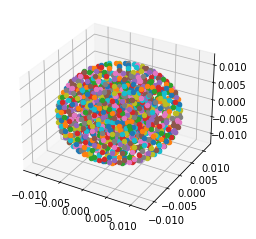

In [8]:
# Sphere volume kernel 
num_points = 500
r = 1
Raduis = 15*dx # radius
r_n = 5 # number of shells
dr  = Raduis / r_n
R   = np.linspace(dr, Raduis, r_n)
N   = []

for RR in reversed(R):
    N.append( ((RR - dr)**3 - (RR - 2*dr)**3) / (RR**3 - (RR - dr)**3) * num_points )

# Number points on each shell    
N=np.roll(N,1)
N = N[::-1]

count_list = []
points_on_shell = []

fig = plt.figure()
ax = plt.axes(projection='3d')
for RR, NN in zip(R, N):
    alpha = 4.0 * np.pi * r * r / int(NN)
    ds = np.sqrt(alpha)
    i_nu  = int(np.round(np.pi / ds))
    d_nu  = np.pi / i_nu
    d_phi = alpha / d_nu   
    plus_array = []
    count = 0
    for i in range (0, i_nu):
        theta = np.pi * (i + 0.5) / i_nu
        j_phi = int(np.round(2 * np.pi * np.sin(theta) / d_phi))
        for j in range (0,j_phi):
            phi = 2 * np.pi * j / j_phi
            x  = RR * np.sin(theta) * np.cos(phi)
            y  = RR * np.sin(theta) * np.sin(phi)
            z  = RR * np.cos(theta)
            count += 1
            ax.scatter3D(x, y, z, 'gray')
            plus_array.append([x, y, z]) 

    points_on_shell.append(plus_array)  
    count_list.append(count)

In [ ]:
Int_du2 = []

# Sphere volume
V = (4/3*np.pi*R**3)

# Iterate 10000 random points
for point in points:  
    duii2 = 0
    # Iterate 5 shells
    for i_r in range(0,r_n):
        points_on_currentshell = np.array(points_on_shell[int(i_r)])
       
        # Coordinates for +/- points
        Points_plus  =  np.array(points_on_currentshell) + point
        Points_minus = -np.array(points_on_currentshell) + point

        # Velocities at + points
        Velocity_plus  = # Velocity at 'Points_plus'  from users' database      
        # Velocities at - points
        Velocity_minus = # Velocity at 'Points_minus' from users' database 

        # dui^2
        du = Velocity_plus - Velocity_minus
        du2 = du*du
        dq2 = [[sum(du22)] for du22 in du2]
        
        # dV
        dV = ((4 / 3) * np.pi * R[i_r]**3 - (4 / 3) * np.pi * (R[i_r] - dr)**3) / count_list[int(i_r)]
    
        # Local k_\ell
        duii2 = duii2 + dV * sum(np.array(dq2))
    
    Int_du2.append(duii2 / V)